## Alfina Nur Safitri
## Tugas 3 DSU  

Dataset yang digunakan adalah Netflix Movies and TV Shows dari https://www.kaggle.com/datasets/shivamb/netflix-shows.

Keterangan variabel-variabel dari dataset tersebut adalah sebagai berikut :

1. Show_id : Id film
2. Type : Tipe netflix
3. Title : Judul film
4. Director : Sutradara film
5. Cast : Pemeran film
6. Country : Negara
7. date_added : Tanggal ditambahkan
8. release_year : Tahun rilis film
9. rating : Kualitas film di netfix, sebagaimana dinilai oleh pengulas
10. duration : Durasi pada setiap film
11. listed_in : Jenis film yang terdaftar di netflix
12. description : Deskripsi singkat film

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats.stats import pearsonr

In [ ]:
data = pd.read_csv('C:/Users/USER/Downloads/netflix_titles.csv')
print(data.shape)
# print('Baris = ', B, ', Kolom = ', K)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Cek type data dan missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Mengganti nilai \n pada variabel diatas dengan nilai NaN
data[['director']] = data[['director']].replace('\n',np.nan)

In [ ]:
# Mengganti nilai \n pada variabel diatas dengan nilai NaN
data[['cast']] = data[['cast']].replace('\n',np.nan)

In [ ]:
# Mengganti nilai \n pada variabel diatas dengan nilai NaN
data[['country']] = data[['country']].replace('\n',np.nan)

In [ ]:
d = data.dropna()

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
show_id         5332 non-null object
type            5332 non-null object
title           5332 non-null object
director        5332 non-null object
cast            5332 non-null object
country         5332 non-null object
date_added      5332 non-null object
release_year    5332 non-null int64
rating          5332 non-null object
duration        5332 non-null object
listed_in       5332 non-null object
description     5332 non-null object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [ ]:
d.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
d.duplicated().sum()

0

In [ ]:
print(d.shape)
d.head()

(5332, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


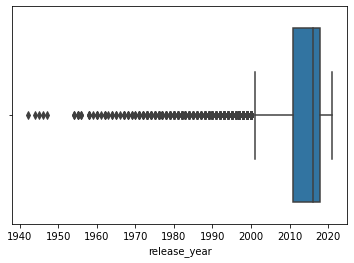

In [ ]:
sns.boxplot(data= d, x='release_year')

In [ ]:
# Trimming : IQR
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

release_year    7.0
dtype: float64


In [ ]:
datanetfliks = d[~((d<(Q1-1.5*IQR))|(d>(Q3+1.5*IQR))).any(axis=1)]
datanetfliks.shape # data setelah di cek dan diremove outlier

(4859, 12)

In [ ]:
# data sebelum diremove outlier
d.shape

(5332, 12)

Jadi, data yang merupakan outlier dengan kata lain jauh dari data-data yang lain telah dibuang sejumlah 473 dengan IQR dari dataset

In [ ]:
datanetfliks.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [ ]:
# Statistik sederhana dari semua variabel data
datanetfliks.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,4859,4859,4859,4859,4859,4859,4859,4859.00000,4859,4859,4859,4859
unique,4859,2,4859,3694,4735,578,1439,NaN,14,186,292,4850
top,s8364,Movie,"I love you, stupid","Raúl Campos, Jan Suter",Samuel West,United States,"October 1, 2018",NaN,TV-MA,97 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,4713,1,18,10,1616,60,NaN,1770,121,321,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.20354,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.49925,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


Diperoleh dari data sejumlah 4859 terdapat 2 tipe, 4859 judul, 3694 director, 4735 pemeran, asal film dari 578 negara, 1439 tanggal yang ditambahkan, 14 rating, 186 macam durasi, 292 jenis film yang terdaftar, 4850 macam deskripsi, dan rata-rata tahun release sekitar 2015an. Tahun release film sekitaran tahun 2001-2021

Dari data juga dapat dilihat show_id yang paling sering muncul pada s8364, type movie, title I love you, stupid, director Raul Campos, Jan Suter, pemeran paling top Samuel West, Negara yang paling banyak United States, tanggal yang paling sering ditambahkan pada tanggal 1 Oktober 2018, rating yang paling banyak TV-MA, durasi paling banyak diminati 97 menit, Jenis film yang paling banyak Dramas, International movies.

Text(0.5, 1.0, '5 Top Director')

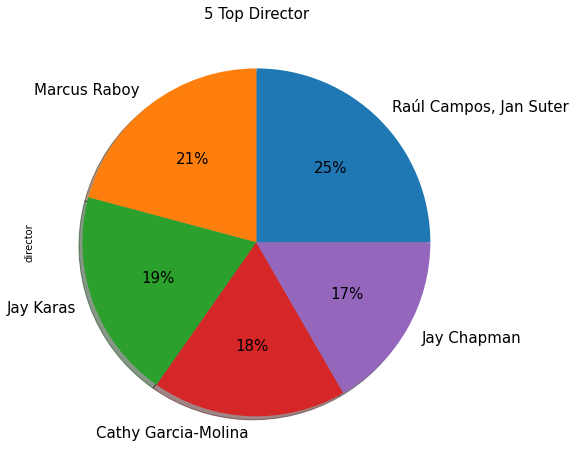

In [ ]:
# 5 top Director
Director_ten = datanetfliks.groupby(datanetfliks['director'])['director'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
Director_ten.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("5 Top Director", fontsize = 15)

Text(0.5, 1.0, '10 Top Title')

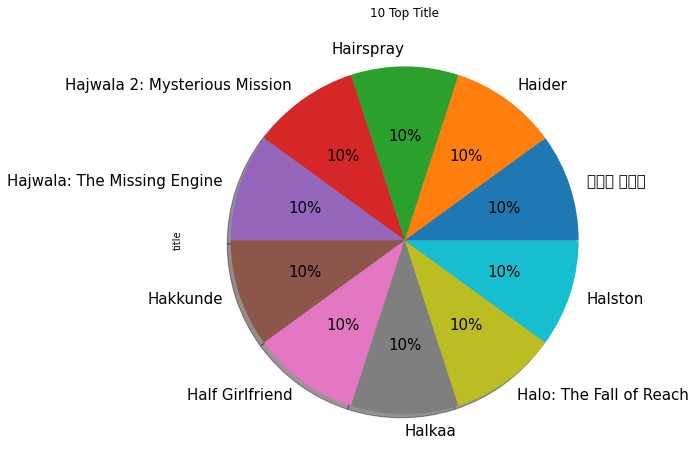

In [ ]:
# 10 top title
Title_ten = datanetfliks.groupby(datanetfliks['title'])['title'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
Title_ten.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("10 Top Title")

Text(0.5, 1.0, '5 Kategori film terbanyak di platform netflix')

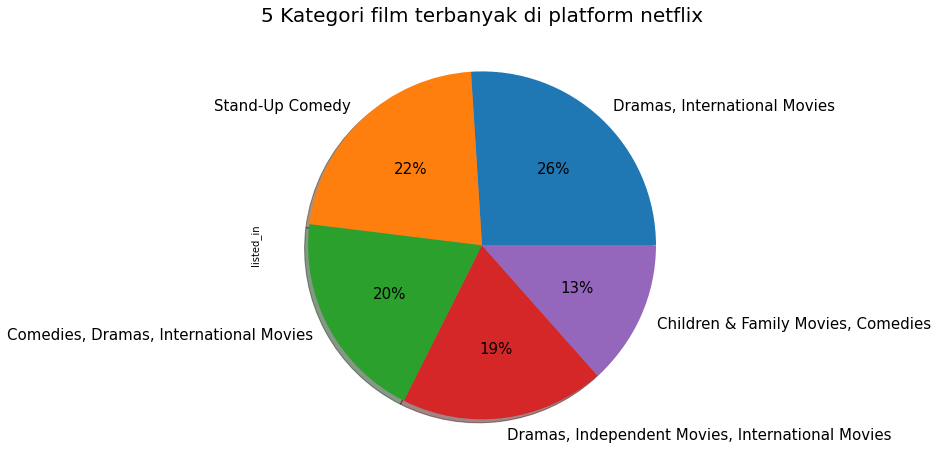

In [ ]:
# 5 kategori film terbanyak
listedin_five = datanetfliks.groupby(datanetfliks['listed_in'])['listed_in'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
listedin_five.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("5 Kategori film terbanyak di platform netflix", fontsize = 20)

Text(0.5, 1.0, '10 negara terbanyak dari film netflix')

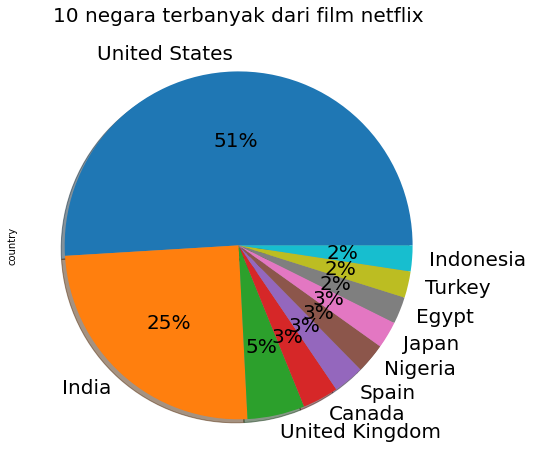

In [ ]:
# 10 negara terbanyak dari film netflix
country_ten = datanetfliks.groupby(datanetfliks['country'])['country'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
country_ten.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 20)
plt.title("10 negara terbanyak dari film netflix", fontsize = 20)

Text(0.5, 1.0, '5 negara terbanyak dari film netflix')

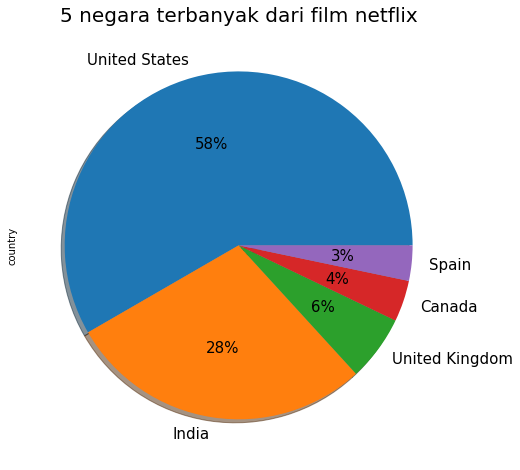

In [ ]:
# 5 negara terbanyak dari film netflix
country_five = datanetfliks.groupby(datanetfliks['country'])['country'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
country_five.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("5 negara terbanyak dari film netflix", fontsize = 20)

In [ ]:
# negara-negara asal dari film netflix dengan banyaknya tipe
CT = pd.crosstab(index = datanetfliks["country"], columns = datanetfliks["type"])
CT

type,Movie,TV Show
country,,
", France, Algeria",1,0
Argentina,31,1
"Argentina, Brazil, France, Poland, Germany, Denmark",1,0
"Argentina, Chile",2,0
"Argentina, Chile, Peru",1,0
...,...,...
"Uruguay, Guatemala",1,0
"Uruguay, Spain, Mexico",1,0
Venezuela,1,0


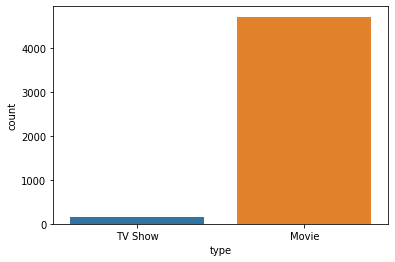

In [ ]:
s = sns.countplot(x = "type", data = datanetfliks)

Diperoleh dari diagram di atas bahwa type movie lebih banyak digunakan dibandingkan type TV Show.

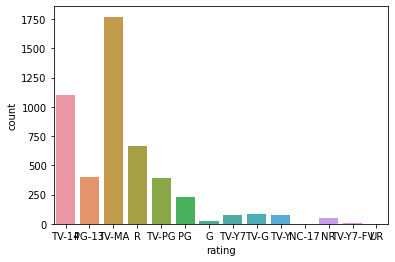

In [ ]:
s = sns.countplot(x = "rating", data = datanetfliks)

Diperoleh dari diagram di atas bahwa rating yang paling banyak yaitu TV-MA

In [ ]:
# Berbagai jenis rating dengan durasi film
RD = pd.crosstab(index = datanetfliks["rating"], columns = datanetfliks["duration"])
RD

duration,1 Season,100 min,101 min,102 min,103 min,104 min,105 min,106 min,107 min,108 min,...,90 min,91 min,92 min,93 min,94 min,95 min,96 min,97 min,98 min,99 min
rating,,,,,,,,,,,,,,,,,,,,,
G,0,1,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,1
NC-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NR,0,0,1,1,0,0,1,2,0,0,...,3,1,1,1,1,3,1,0,0,0
PG,0,9,4,4,3,7,3,6,6,2,...,11,13,12,14,7,10,6,5,5,9
PG-13,0,3,14,10,10,9,9,12,7,9,...,7,11,6,5,13,6,14,17,14,7
R,0,14,19,14,15,14,14,17,12,13,...,20,22,13,26,24,23,20,26,12,14
TV-14,20,17,18,21,17,12,19,18,12,14,...,12,17,21,21,20,21,20,12,27,22
TV-G,3,1,0,2,1,2,3,0,4,0,...,1,0,5,2,0,3,1,1,0,0
TV-MA,64,37,32,44,39,34,30,29,36,28,...,43,36,37,35,44,43,30,50,33,44


In [ ]:
# type dengan banyaknya tahun release yang di atas tahun 2020
TR = pd.crosstab(index = datanetfliks["type"], columns = datanetfliks["release_year"] & (datanetfliks.release_year > 2020))
TR

release_year,False,True
type,,
Movie,4567,146
TV Show,131,15


In [ ]:
# type dengan banyaknya tahun release
TR = pd.crosstab(index = datanetfliks["type"], columns = datanetfliks["release_year"])
TR

release_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,,,,,,,,
Movie,39,44,50,54,65,80,71,110,112,139,...,159,195,234,340,567,640,632,495,409,146
TV Show,1,0,0,0,0,3,0,0,0,1,...,4,2,8,9,10,17,16,24,33,15


In [ ]:
# Judul film dari type Movie yang tahun releasenya di atas tahun 2020 dari United States
datanetfliks.loc[(datanetfliks.type == "Movie") & (datanetfliks.country == "United States") & (datanetfliks.release_year > 2020)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
81,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,"September 10, 2021",2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
231,s232,Movie,The Water Man,David Oyelowo,"David Oyelowo, Rosario Dawson, Lonnie Chavis, ...",United States,"August 25, 2021",2021,PG,92 min,"Children & Family Movies, Dramas","Desperate to save his ailing mother, 11-year-o..."
247,s248,Movie,Sweet Girl,Brian Andrew Mendoza,"Jason Momoa, Isabela Merced, Manuel Garcia-Rul...",United States,"August 20, 2021",2021,R,110 min,"Action & Adventure, Dramas",He lost the love of his life to a pharmaceutic...
295,s296,Movie,The Paper Tigers,Quoc Bao Tran,"Alain Uy, Ron Yuan, Mykel Shannon Jenkins, Jae...",United States,"August 7, 2021",2021,PG-13,111 min,"Action & Adventure, Comedies","After reuniting as middle-aged men, three kung..."
307,s308,Movie,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
437,s438,Movie,Cosmic Sin,Edward Drake,"Frank Grillo, Bruce Willis, Brandon Thomas Lee...",United States,"July 17, 2021",2021,R,88 min,Action & Adventure,"In the year 2524, a disgraced retired general ..."
618,s619,Movie,America: The Motion Picture,Matt Thompson,"Channing Tatum, Jason Mantzoukas, Olivia Munn,...",United States,"June 30, 2021",2021,TV-MA,98 min,"Action & Adventure, Comedies",A chainsaw-wielding George Washington teams wi...
643,s644,Movie,The Seventh Day,Justin P. Lange,"Guy Pearce, Vadhir Derbez, Stephen Lang, Brady...",United States,"June 24, 2021",2021,R,87 min,Horror Movies,An inexperienced priest teams up with a harden...
685,s686,Movie,Fatherhood,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",United States,"June 18, 2021",2021,PG-13,111 min,Dramas,"A widowed new dad copes with doubts, fears, he..."


In [ ]:
# film Indonesia yang tahun releasenya mulai dari tahun 2020
datanetfliks.loc[(datanetfliks.country == "Indonesia") & (datanetfliks.release_year >= 2020)].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
452,s453,Movie,A Perfect Fit,Hadrah Daeng Ratu,"Nadya Arina, Refal Hady, Giorgino Abraham, Ang...",Indonesia,"July 15, 2021",2021,TV-PG,113 min,"Comedies, Dramas, International Movies",Sparks fly when a fashion blogger in Bali meet...
1090,s1091,Movie,Story of Kale: When Someone's in Love,Angga Dwimas Sasongko,"Ardhito Pramono, Aurélie Moeremans, Arya Salok...",Indonesia,"April 8, 2021",2020,TV-PG,78 min,"Dramas, International Movies, Romantic Movies","After leaving a toxic relationship, Dinda emba..."
1136,s1137,Movie,Tersanjung the Movie,"Hanung Bramantyo, Pandu Adjisurya","Clara Bernadeth, Giorgino Abraham, Kevin Ardil...",Indonesia,"April 1, 2021",2021,TV-14,114 min,"Dramas, International Movies, Romantic Movies","After growing up in a tumultuous household, Yu..."
1221,s1222,Movie,Generasi 90an: Melankolia,Mohammad Irfan Ramly,"Ari Irham, Aghniny Haque, Taskya Namya, Marcel...",Indonesia,"March 11, 2021",2020,TV-14,94 min,"Dramas, International Movies","After the devastating loss of a loved one, Abb..."
1237,s1238,Movie,Mariposa,Fajar Bustomi,"Adhisty Zara, Angga Yunanda, Dannia Salsabila,...",Indonesia,"March 4, 2021",2020,TV-14,116 min,"Comedies, International Movies, Romantic Movies","New student Acha falls for Iqbal, a high-achie..."


In [ ]:
datanetfliks.iloc[0:5, 0:2]

,show_id,type
8,s9,TV Show
9,s10,Movie
12,s13,Movie
27,s28,Movie
28,s29,Movie


In [ ]:
# film Indonesia yang tahun releasenya di bawah tahun 2020
datanetfliks.loc[(datanetfliks.country == "Indonesia") & (datanetfliks.release_year < 2020)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
534,s535,Movie,Si Doel the Movie 2,Rano Karno,"Maudy Koesnaedi, Rano Karno, Cornelia Agatha, ...",Indonesia,"July 6, 2021",2019,TV-G,95 min,"Dramas, International Movies",As Sarah and her child look to settle in Jakar...
1413,s1414,Movie,Tanda Tanya,Hanung Bramantyo,"Reza Rahadian, Revalina S. Temat, Rio Dewanto,...",Indonesia,"January 14, 2021",2011,TV-MA,102 min,"Dramas, International Movies","In a story of interconnected lives, three fami..."
1475,s1476,Movie,Too Handsome to Handle,Sabrina Rochelle Kalangie,"Ari Irham, Nikita Willy, Calvin Jeremy, Rachel...",Indonesia,"December 31, 2020",2019,TV-14,106 min,"Comedies, Dramas, International Movies",Wary of the effects of his good looks on other...
1495,s1496,Movie,Bridezilla,Andibachtiar Yusuf,"Jessica Mila, Rio Dewanto, Sheila Dara, Rafael...",Indonesia,"December 24, 2020",2019,TV-MA,94 min,"Comedies, Dramas, International Movies",After failing to deliver for a demanding bride...
1496,s1497,Movie,Cemara's Family,Yandy Laurens,"Ringgo Agus Rahman, Nirina Zubir, Zara JKT48, ...",Indonesia,"December 24, 2020",2018,TV-G,110 min,"Children & Family Movies, Dramas, Internationa...","After bankruptcy, Abah and Emak must adapt to ..."
1525,s1526,Movie,Eggnoid: Love & Time Portal,Naya Anindita,"Morgan Oey, Sheila Dara, Luna Maya, Kevin Juli...",Indonesia,"December 17, 2020",2019,TV-14,102 min,"Dramas, International Movies, Romantic Movies",Sent from the future to look after a lonely gi...
2027,s2028,Movie,Satria Heroes: Revenge of the Darkness,"Kenzo Maihara, Amandha Wyanto","Christian Loho, Fernando Surya, Yayan Ruhian, ...",Indonesia,"September 10, 2020",2017,TV-G,92 min,Children & Family Movies,"As he rebuilds society in a parallel universe,..."
2051,s2052,Movie,Ave Maryam,Ertanto Robby Soediskam,"Maudy Koesnaedi, Chicco Jerikho, Tutie Kirana,...",Indonesia,"September 3, 2020",2018,TV-PG,73 min,"Dramas, Independent Movies, International Movies",A devoted nun who cares for her elder sisters ...
2481,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
2531,s2532,Movie,Dilan 1990,"Fajar Bustomi, Pidi Baiq","Vanesha Prescilla, Iqbaal Ramadhan, Debo Andry...",Indonesia,"May 14, 2020",2018,TV-14,109 min,"Dramas, International Movies, Romantic Movies","At a Bandung high school, charming and rebelli..."


In [ ]:
# film yang tahun relaesenya di bawah tahun 2020 paling terlama
datanetfliks.loc[datanetfliks.release_year < 2020].tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
# film yang tahun relaesenya di atas tahun 2020 paling terbaru
datanetfliks.loc[datanetfliks.release_year > 2020].tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1411,s1412,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."
1412,s1413,Movie,Wish You,Sung Do-jun,"Kang In-soo, Lee Sang, Soo-bin",South Korea,"January 15, 2021",2021,TV-PG,102 min,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing..."
1424,s1425,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."
1432,s1433,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,"January 8, 2021",2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."


Pada kasus data ini, tidak ada pengaruh hubungan korelasi antar variabel karena data yang digunakan bersifat kategorik dan hanya ada 1 variabel pada data yang numerik.